<a href="https://colab.research.google.com/github/roberthsheng/100pgml/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(42)
N = 1000
X = np.random.randn(N, 2)  # 2 input features
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(float)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  s = sigmoid(x)
  return s * (1 - s)

class NN:
  def __init__(self, input_size, hidden_size, output_size):
    self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0/input_size)
    self.b1 = np.zeros((1, hidden_size))
    self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0/hidden_size)
    self.b2 = np.zeros((1, output_size))

  def forward(self, X):
    self.z1 = X @ self.W1 + self.b1
    self.a1 = sigmoid(self.z1)
    self.z2 = self.a1 @ self.W2 + self.b2
    self.a2 = sigmoid(self.z2)
    return self.a2

  def loss(self, y_pred, y_true):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

  def backprop(self, X, y):
    m = X.shape[0]
    y = y.reshape(-1, 1)

    dz2 = self.a2 - y

    dW2 = (1 / m) * self.a1.T @ dz2
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

    dz1 = (dz2 @ self.W2.T) * sigmoid_derivative(self.z1)

    dW1 = (1 / m) * X.T @ dz1
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

  def train(self, X, y, epochs, learning_rate):
    losses = []
    for epoch in range(epochs):
      y_pred = self.forward(X)
      loss = self.loss(y_pred, y)
      losses.append(loss)
      dW1, db1, dW2, db2 = self.backprop(X, y)
      self.W1 -= learning_rate * dW1
      self.b1 -= learning_rate * db1
      self.W2 -= learning_rate * dW2
      self.b2 -= learning_rate * db2

      if epoch % 100 == 0:
        accuracy = np.mean((y_pred > 0.5) == y)
        print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    return losses



In [15]:
nn = NN(2, 4, 1)
losses = nn.train(X, y, epochs=1000, learning_rate=0.01)

Epoch 0, Loss: 0.856567795712454, Accuracy: 0.493
Epoch 100, Loss: 0.7667572677314699, Accuracy: 0.493686
Epoch 200, Loss: 0.7313217027045523, Accuracy: 0.495492
Epoch 300, Loss: 0.7172974604683032, Accuracy: 0.497144
Epoch 400, Loss: 0.7112233554037077, Accuracy: 0.498264
Epoch 500, Loss: 0.7081039021812837, Accuracy: 0.49881
Epoch 600, Loss: 0.7061342785386326, Accuracy: 0.499356
Epoch 700, Loss: 0.7046614342014005, Accuracy: 0.499692
Epoch 800, Loss: 0.7034437764085834, Accuracy: 0.49993
Epoch 900, Loss: 0.7023869161769416, Accuracy: 0.500056


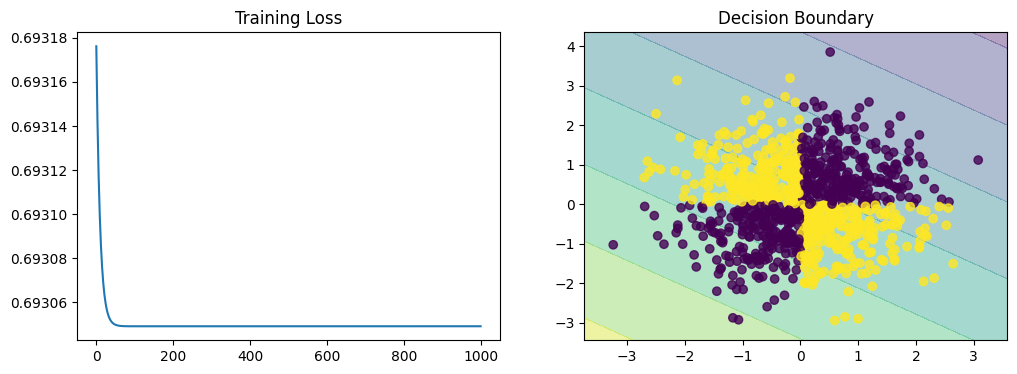

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(losses)
plt.title('Training Loss')

plt.subplot(122)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.title('Decision Boundary')
plt.show()